In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)

In [2]:
class FLSA_2D:
    __slots__ = ["__beta_tilde", "__lambda_1", "__lambda_2", "__lambda_3", "__tol"]
    
    @property
    def coef_(self):
        return self.__beta_tilde
        
    def __init__(self, lambda_1=1.0, lambda_2=1.0, lambda_3=1.0, tol=0.0001):
        self.__beta_tilde = np.array([])

        self.__lambda_1 = lambda_1
        self.__lambda_2 = lambda_2
        self.__lambda_3 = lambda_3
        self.__tol = tol
        
        return

    def fit(self, y):
        self.__beta_tilde = np.zeros(y.shape)
        
        return self

In [3]:
y_original_small = np.random.binomial(1, 0.3, 8 * 8).reshape(8, 8) * np.random.uniform(0, 1, (8, 8)).round(2)
y_original = y_original_small.repeat(32, axis=0).repeat(32, axis=1)
y = y_original + np.random.normal(0, 0.1, y_original.shape)

In [4]:
y_train, y_test = y[::2, ::2], y[1::2, 1::2]

In [5]:
model = FLSA_2D().fit(y_train)

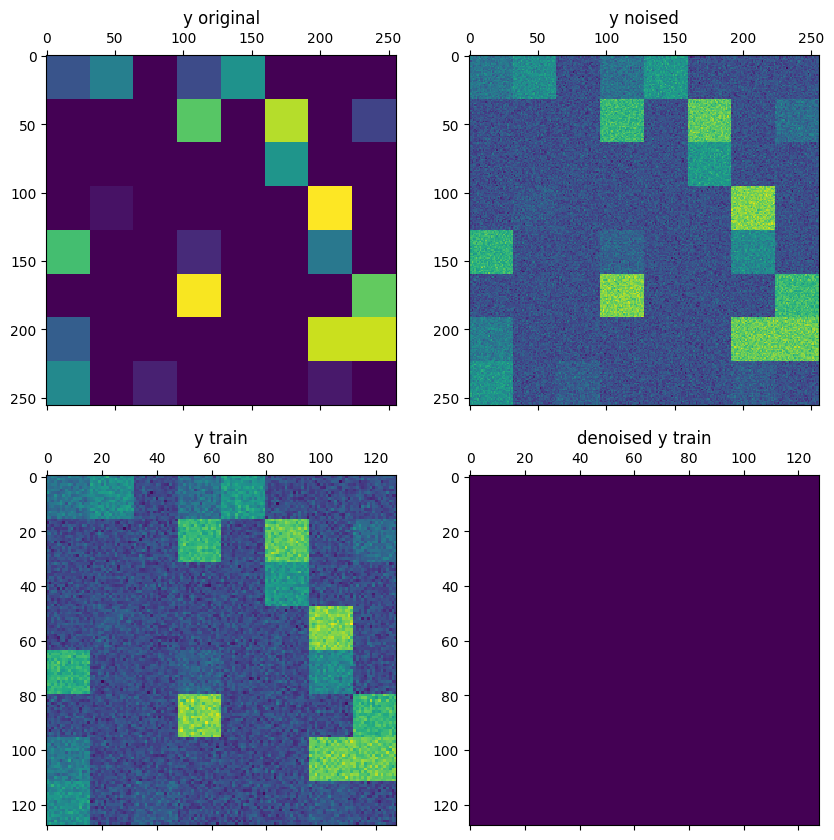

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].matshow(y_original)
ax[0][0].set_title("y original")
ax[0][1].matshow(y)
ax[0][1].set_title("y noised")
ax[1][0].matshow(y_train)
ax[1][0].set_title("y train")
ax[1][1].matshow(model.coef_)
ax[1][1].set_title("denoised y train")
plt.show()